In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [13]:
df = pd.read_csv('streamlit/data_with_target.csv')

In [14]:
df.isnull().sum()

Unnamed: 0               0
track_id                 0
album_comments           0
album_date_created       0
album_favorites          0
                        ..
listens_bins             0
genre_pred               0
number_of_genres         0
number_of_genres_bins    0
license_category         0
Length: 563, dtype: int64

In [15]:
df.describe()

,Unnamed: 0,track_id,album_comments,album_favorites,album_id,album_listens,album_tracks,artist_comments,artist_favorites,artist_id,...,album_information_bin,artist_bio_bin,months_life,listens_month,bonus_listens,listens_incl_bonus,listens_bins,genre_pred,number_of_genres,license_category
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,3999.50000,84126.770125,0.538625,2.025250,13528.950125,38310.885250,11.133625,2.816250,41.649000,12984.194250,...,0.812750,0.739250,46.713625,172.897367,19.180750,4748.862875,1.505000,2.12500,7.281250,2.514375
std,2309.54541,43297.426287,1.392211,3.825728,6022.260415,63144.554876,8.086096,7.320293,111.371453,6994.459659,...,0.390136,0.439071,28.929487,326.865078,157.484017,12220.622958,1.106064,1.45246,3.634288,1.139498
min,0.00000,2.000000,0.000000,0.000000,1.000000,1008.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,2.742574,0.000000,196.000000,0.000000,1.00000,3.000000,1.000000
25%,1999.75000,49063.500000,0.000000,0.000000,9034.000000,7969.000000,6.000000,0.000000,2.000000,7295.000000,...,1.000000,0.000000,21.000000,27.144267,0.000000,1273.750000,1.000000,1.00000,4.000000,1.000000
50%,3999.50000,89281.000000,0.000000,1.000000,14793.000000,16996.000000,9.000000,0.000000,8.000000,13830.000000,...,1.000000,1.000000,44.000000,71.685055,0.000000,2505.500000,2.000000,1.00000,5.000000,3.000000
75%,5999.25000,122545.000000,0.000000,2.000000,18512.000000,40793.000000,14.000000,2.000000,25.000000,19459.000000,...,1.000000,1.000000,70.000000,191.795493,0.000000,4937.000000,2.000000,4.00000,10.000000,3.000000
max,7999.00000,155066.000000,12.000000,40.000000,22899.000000,674347.000000,47.000000,68.000000,963.000000,24252.000000,...,1.000000,1.000000,101.000000,9839.750000,3579.000000,543252.000000,3.000000,4.00000,16.000000,4.000000


In [20]:
df['album_tracks'].value_counts().sort_index(ascending=True)

album_tracks
1     230
2     211
3     330
4     484
5     646
6     650
7     483
8     499
9     522
10    589
11    569
12    382
13    360
14    242
15    220
16    233
17    120
18    104
19    157
20    136
21     49
22     99
23     74
24     60
25     75
26     37
27     14
28     20
29      4
30     51
31     15
32     13
33     70
34      7
35      5
36     83
37     12
38     53
39      7
40      7
41      5
42     20
43      5
45     21
46      1
47     26
Name: count, dtype: int64

In [17]:
df['track_title_char_count'].sort_index(ascending=True)

0        4
1       10
2        7
3       18
4        4
        ..
7995     3
7996    11
7997     7
7998    27
7999     3
Name: track_title_char_count, Length: 8000, dtype: int64

In [32]:
df['track_title_char_count'].unique()

array([  4,  10,   7,  18,  21,  15,  13,  16,  14,   8,  19,  12,   5,
        17,   6,  20,   9,  11,  28,  25,   3,   2,  26,  38,  23,  31,
        29,  24,  27,  53,  22,  42,  46,  33,  35,  49,  34,  51,  37,
        32,  40,  30,   1,  36,  39,  70,  60,  41,  43,  59,  65,  69,
        61,  55,  44,  79,  71,  52,  72,  56,  45,  54,  62,  57, 103,
        58,  63,  64,  50,  47, 102,  87,  83,  66,  91,  78, 100,  98,
        75,  48,  68,  89,  97,  67,  88, 152,  82,  84,  90,  80])

In [25]:
df['album_tracks'].sort_index(ascending=False)

7999     4
7998    11
7997    11
7996    18
7995    18
        ..
4        2
3        1
2        2
1        7
0        7
Name: album_tracks, Length: 8000, dtype: int64

In [34]:
df['album_information_bin'].head()

0    1
1    1
2    0
3    1
4    1
Name: album_information_bin, dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'album_comments', 'album_date_created',
       'album_favorites', 'album_id', 'album_listens', 'album_title',
       'album_tracks', 'album_type',
       ...
       'artist_bio_bin', 'months_life', 'listens_month', 'bonus_listens',
       'listens_incl_bonus', 'listens_bins', 'genre_pred', 'number_of_genres',
       'number_of_genres_bins', 'license_category'],
      dtype='object', length=563)

In [9]:
df.head()

,Unnamed: 0,track_id,album_comments,album_date_created,album_favorites,album_id,album_listens,album_title,album_tracks,album_type,...,artist_bio_bin,months_life,listens_month,bonus_listens,listens_incl_bonus,listens_bins,genre_pred,number_of_genres,number_of_genres_bins,license_category
0,0,2,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,1,101,12.801980,0.0,1293.0,1,1,4,"(0.0, 4.0]",3
1,1,5,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,1,101,11.396040,0.0,1151.0,0,1,4,"(0.0, 4.0]",3
2,2,10,0,2008-11-26 01:45:08,4,6,47632,Constant Hitmaker,2,Album,...,1,101,496.386139,0.0,50135.0,3,1,4,"(0.0, 4.0]",4
3,3,140,1,2008-11-26 01:49:59,1,61,1300,The Blind Spot,1,Album,...,1,101,12.861386,0.0,1299.0,1,1,4,"(0.0, 4.0]",1
4,4,141,0,2008-11-26 01:49:57,1,60,1304,Every Man For Himself,2,Album,...,1,101,7.178218,0.0,725.0,0,1,4,"(0.0, 4.0]",1


In [10]:
df['track_listens'].nunique()

4927

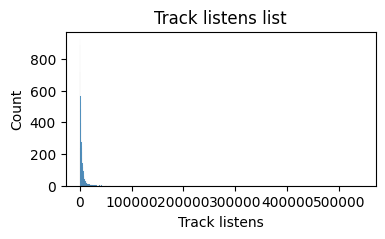

In [11]:
plt.figure(figsize=(4,2))
sns.histplot(data = df,x= 'track_listens')
plt.title('Track listens list')
plt.xlabel('Track listens')
plt.ylabel('Count')
plt.show()

/var/folders/8w/myfdtq1d7b72n5nwcbg2dlyh0000gn/T/ipykernel_2187/3558468645.py:1: FutureWarning: The provided callable <function mean at 0x118a5d580> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = df.groupby(["track_genre_top"])['track_listens'].aggregate(np.mean).reset_index().sort_values(by=['track_listens'], ascending=False)
/var/folders/8w/myfdtq1d7b72n5nwcbg2dlyh0000gn/T/ipykernel_2187/3558468645.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='track_genre_top', y='track_listens', data=result, order=result['track_genre_top'], estimator='mean', ci=None)


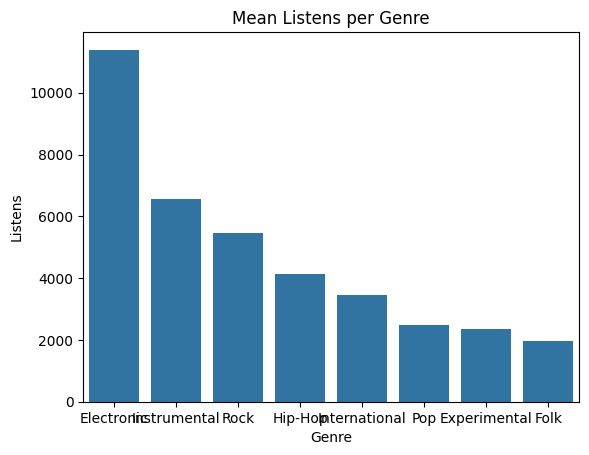

In [12]:
result = df.groupby(["track_genre_top"])['track_listens'].aggregate(np.mean).reset_index().sort_values(by=['track_listens'], ascending=False)

# Use sns.barplot correctly
ax = sns.barplot(x='track_genre_top', y='track_listens', data=result, order=result['track_genre_top'], estimator='mean', ci=None)
ax.set(xlabel='Genre', ylabel='Listens', title="Mean Listens per Genre")

plt.show()

In [13]:
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

Error in callback <function _draw_all_if_interactive at 0x11fca8cc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

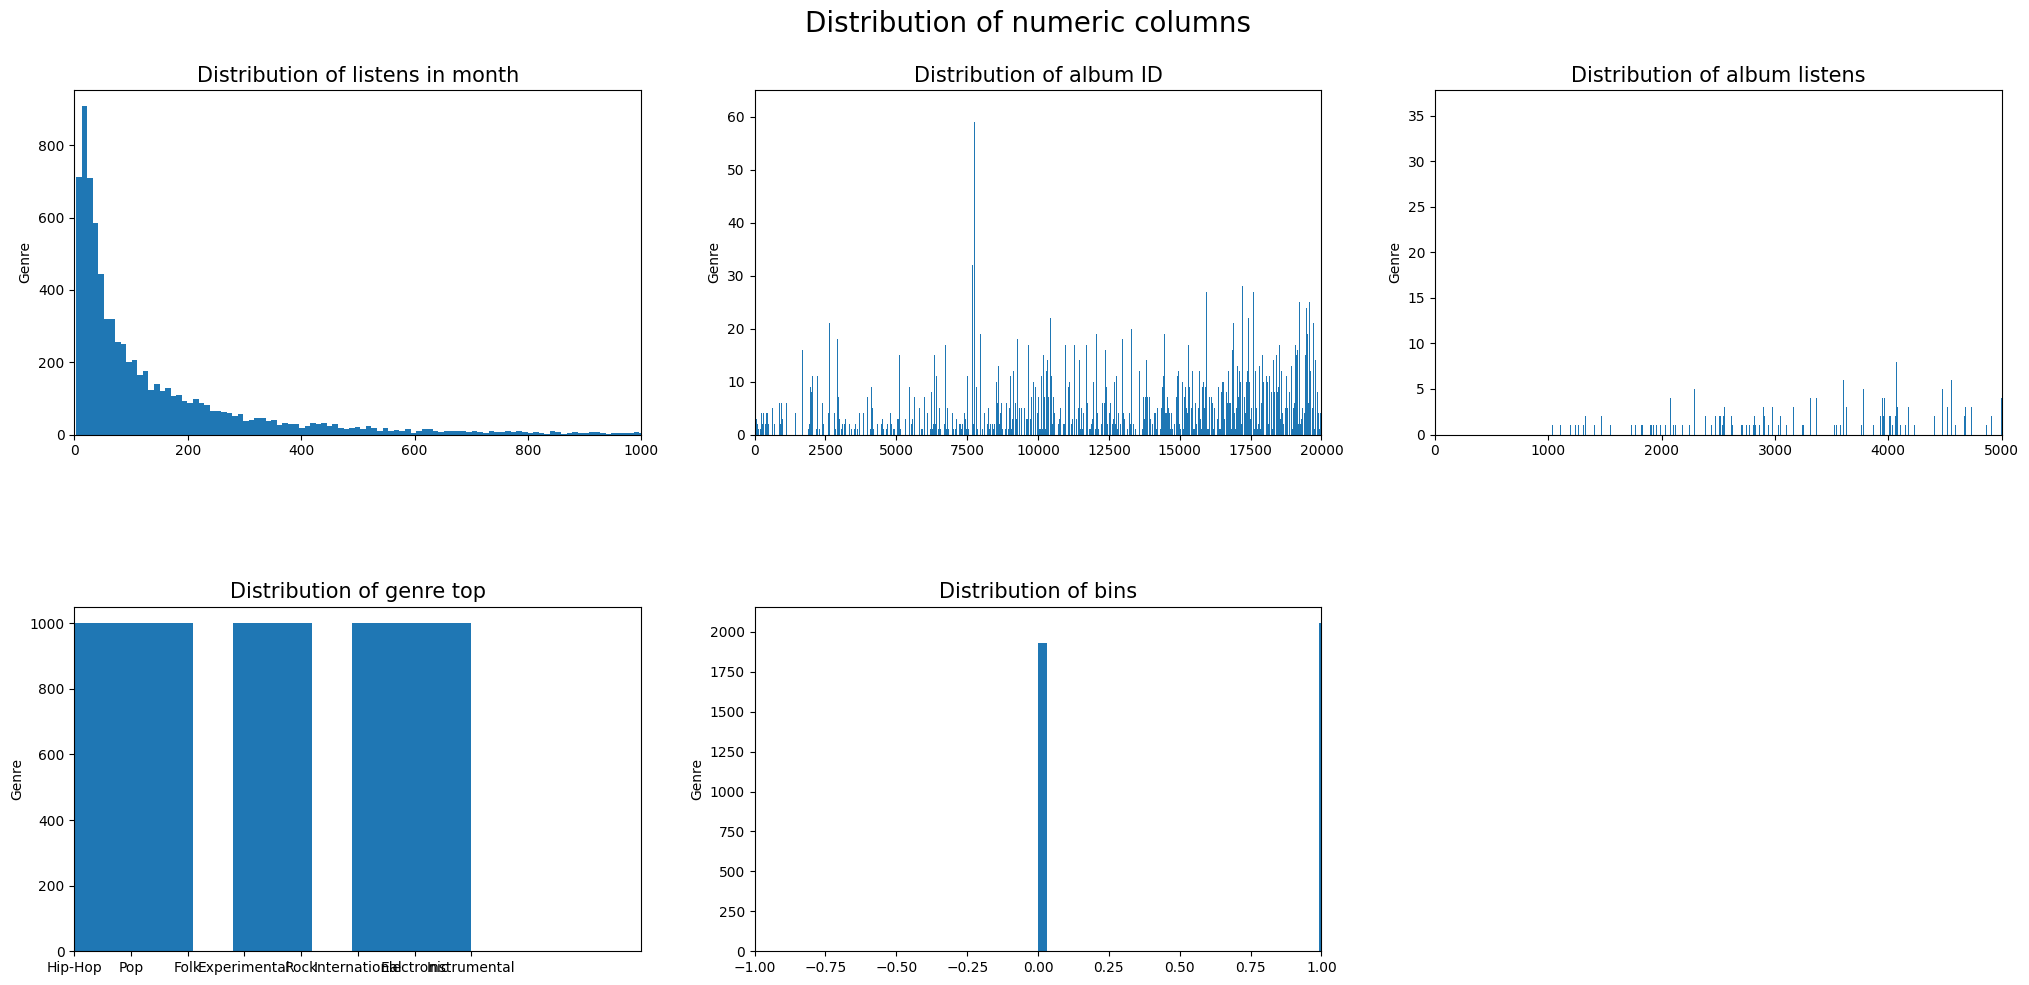

In [14]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['listens_month'], bins=1000)  # creates histogram for number of views
ax[0][0].set_ylabel("Genre", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,1000) # limits the x-axis values from 0 to 1000000 
ax[0][0].set_title("Distribution of listens in month", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['album_id'], bins=2000)
ax[0][1].set_ylabel("Genre", fontsize = 10)
ax[0][1].set_xlim(0,20000)
ax[0][1].set_title("Distribution of album ID", fontsize = 15);

ax[0][2].hist(x=df['album_listens'], bins=500000)
ax[0][2].set_ylabel("Genre", fontsize = 10)
ax[0][2].set_xlim(0,5000)
ax[0][2].set_title("Distribution of album listens", fontsize = 15);

ax[1][0].hist(x=df['track_genre_top'], bins=10)
ax[1][0].set_ylabel("Genre", fontsize = 10)
ax[1][0].set_xlim(0,10)
ax[1][0].set_title("Distribution of genre top", fontsize = 15);
                              
ax[1][1].hist(x=df['listens_bins'], bins=100)
ax[1][1].set_ylabel("Genre", fontsize = 10)
ax[1][1].set_xlim(-1,1)
ax[1][1].set_title("Distribution of bins", fontsize = 15);

fig.delaxes(ax[1][2]);